### Bonus

Identify and analyze 2 additional relationships using data within the dataset. Explain their relevance and specify why these relationships hold significance in the context of the data.

### Relationship 1: filming location and vehicle country

Filming location may affect the review. For instance, filming in a country with bad roads or bad weather might negatively affect overall evaluation.

It's pretty common to see car show presenters driving in scenic locations with vehicles that match the terrain, or match the scenery, or even matching the heritage. Top gear and fifth gear are great examples, with other content creators sometimes following suite. This could bring out a sense of romanticism during the evaluation process that may skew Doug's analysis further.



In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

In [2]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\ChunChunMaru\\Documents\\OCEAN\\doug\\utils.py'>

In [17]:
df = pd.read_csv("DougScore_editted.csv")
# create brand model index
df['brand_model_year']=df.apply(lambda x: f"{x['brand']}_{x['model']}_{x['model_year']}",axis=1)
df.set_index("brand_model_year",inplace=True)

In [18]:
df.columns

Index(['model_year', 'brand', 'model', 'Styling', 'Acceleration', 'Handling',
       'Fun Factor', 'Cool Factor', 'WEEKEND_TOTAL', 'Features', 'Comfort',
       'Quality', 'Practicality', 'Value', 'DAILY_TOTAL', 'DOUGSCORE',
       'Video Link', 'Filming Location', 'Filming State', 'Vehicle Country'],
      dtype='object')

In [38]:
df['Filming Location'].value_counts()

Filming Location
San Diego          181
Los Angeles         50
Santa Ana           32
Newport Beach       29
Upland              26
                  ... 
Somerset County      1
Thermal              1
Napa                 1
Nantucket            1
Douglasville         1
Name: count, Length: 130, dtype: int64

In [46]:
fl_mask= df['Filming Location'].map(df['Filming Location'].value_counts()) < 4
df['Main Location']  =  df['Filming Location'].mask(fl_mask, 'other')
#df['Main Location'] = df.apply(lambda x: "Others" if not x["fl_mask"] else x['Filming Location'] ,axis=1)

In [47]:
fL_df = df[['DOUGSCORE',"WEEKEND_TOTAL", "DAILY_TOTAL", "Main Location"]].groupby('Main Location').mean()

In [48]:
df['Main Location'].value_counts()

Main Location
San Diego            181
other                155
Los Angeles           50
Santa Ana             32
Newport Beach         29
Upland                26
Philadelphia          14
Costa Mesa             9
Tysons Corner          9
Carlsbad               8
La Jolla               7
Irvine                 7
Dubai                  6
Huntingdon Valley      6
El Cajon               6
Birmingham             5
Nashville              5
Tustin                 5
Annapolis              4
Fort Worth             4
Fairfax                4
West Chester           4
Franklin               4
Doral                  4
Name: count, dtype: int64

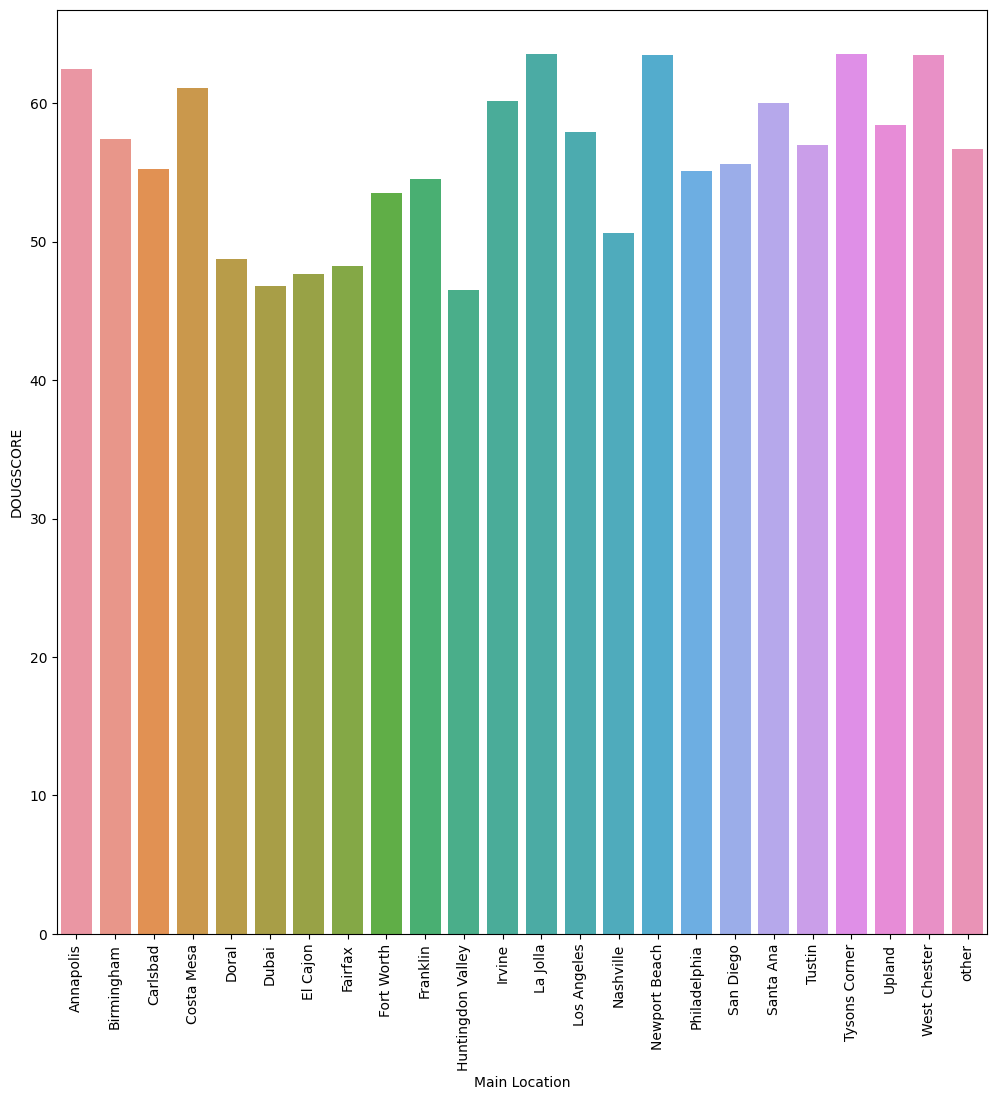

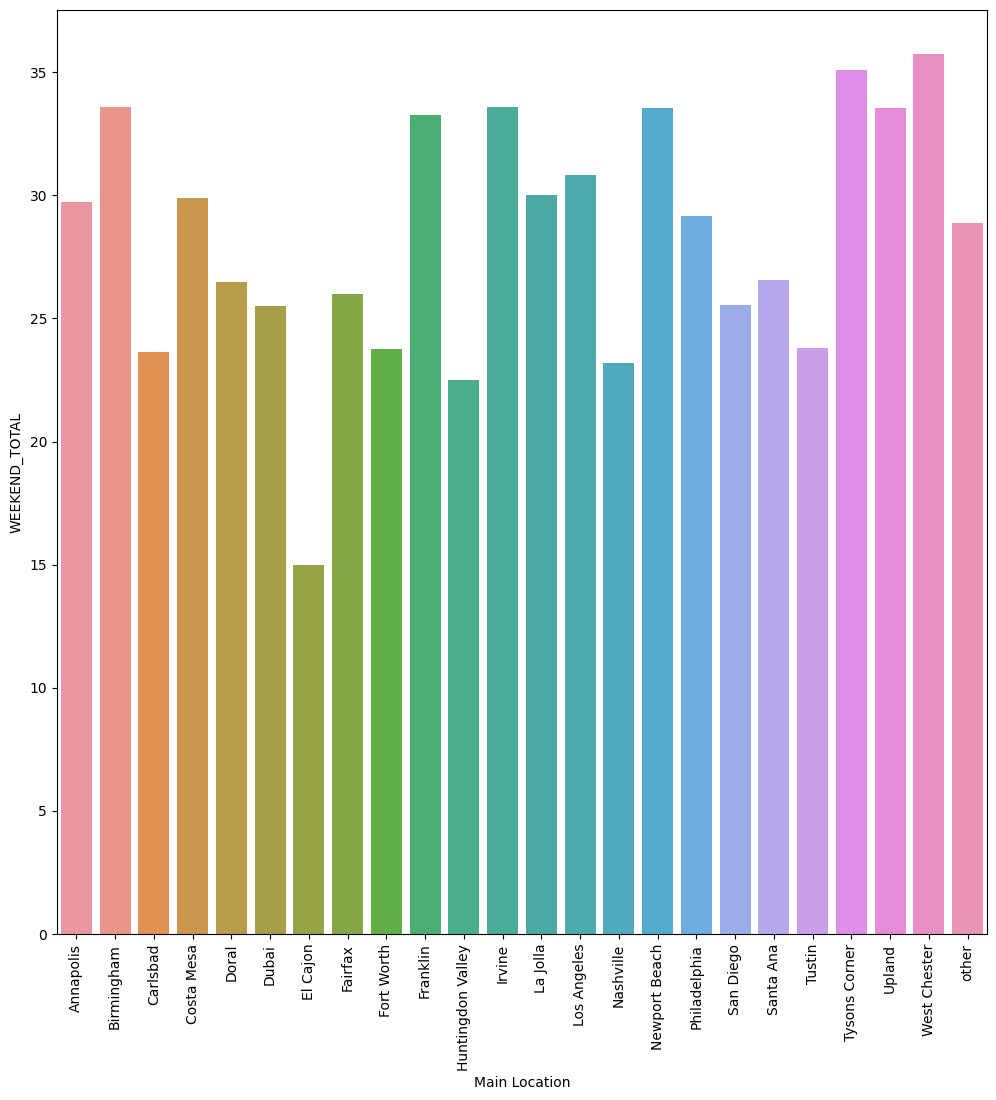

In [54]:
for score in ['DOUGSCORE',"WEEKEND_TOTAL", "DAILY_TOTAL"]:
    fig, ax = plt.subplots(figsize=(12,12))
    sns.barplot(ax= ax, x=fL_df.index,y=fL_df[score])
    plt.xticks(rotation=90)
    plt.show()

### Generally film location is pretty uniform with min around 45 and max around 65.

In [55]:
df["Filming State"].value_counts()

Filming State
California        418
Pennsylvania       38
New Jersey         18
Virginia           17
Maryland           12
Tennessee          10
Texas              10
Florida             8
Michigan            7
UAE                 6
Georgia             4
Minnesota           4
Arizona             4
New York            4
Ohio                4
Washington          3
Ontario             3
Colorado            3
Connecticut         2
Nevada              2
Massachusetts       2
Utah                1
North Carolina      1
West Virginia       1
Quebec              1
Louisiana           1
Australia           1
Name: count, dtype: int64

In [56]:
fl_mask= df['Filming State'].map(df['Filming State'].value_counts()) < 4
df['Main State']  =  df['Filming State'].mask(fl_mask, 'other')
fs_df = df[['DOUGSCORE',"WEEKEND_TOTAL", "DAILY_TOTAL", "Main State"]].groupby('Main State').mean()

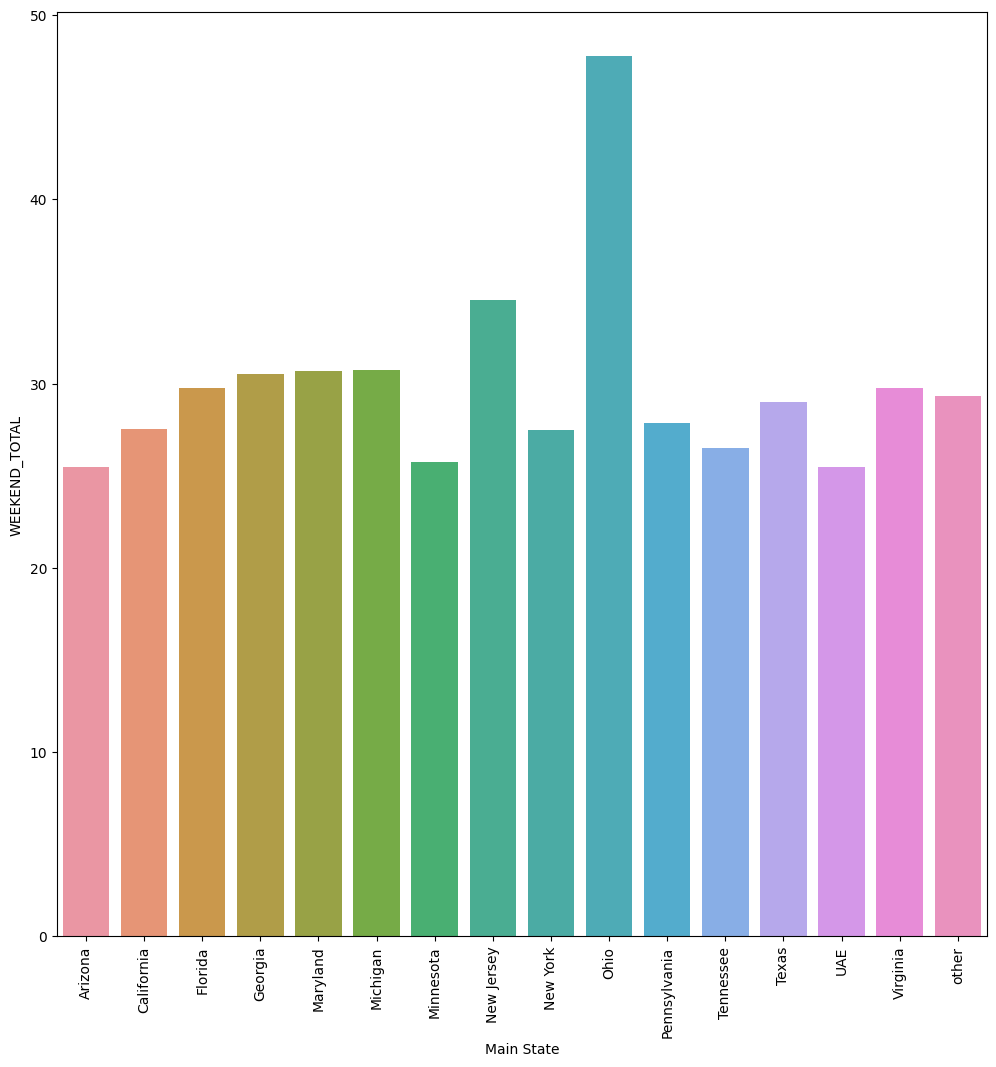

In [57]:
for score in ['DOUGSCORE',"WEEKEND_TOTAL", "DAILY_TOTAL"]:
    fig, ax = plt.subplots(figsize=(12,12))
    sns.barplot(ax= ax, x=fs_df.index,y=fs_df[score])
    plt.xticks(rotation=90)
    plt.show()

### All states are roughly the same doug score aside from Ohio

In [58]:
df[df['Filming State'] == 'Ohio']

model_year       brand       model  Styling  \
brand_model_year                                                       
McLaren_Speedtail_2020         2020     McLaren   Speedtail        8   
Koenigsegg_Regera_2021         2021  Koenigsegg      Regera        8   
McLaren_Sabre_2021             2021     McLaren       Sabre        8   
Porsche_Carrera GT_2005        2005     Porsche  Carrera GT        9   

                         Acceleration  Handling  Fun Factor  Cool Factor  \
brand_model_year                                                           
McLaren_Speedtail_2020             10        10          10           10   
Koenigsegg_Regera_2021             10        10          10           10   
McLaren_Sabre_2021                 10        10          10            9   
Porsche_Carrera GT_2005             9        10          10           10   

                         WEEKEND_TOTAL  Features  ...  DAILY_TOTAL  DOUGSCORE  \
brand_model_year                                  ...                           
McLaren_Speedtail_2020              48         7  ...           26         74   
Koenigsegg_Regera_2021              48         6  ...           24         72   
McLaren_Sabre_2021                  47         6  ...           25         72   
Porsche_Carrera GT_2005             48         3  ...           23         71   

                         Video Link  Filming Location  Filming State  \
brand_model_year                                                       
McLaren_Speedtail_2020     38:57:00          Columbus           Ohio   
Koenigsegg_Regera_2021     38:01:00          Columbus           Ohio   
McLaren_Sabre_2021            15:01          Columbus           Ohio   
Porsche_Carrera GT_2005       10:40         Beachwood           Ohio   

                         Vehicle Country Vehicle Continent fl_mask  \
brand_model_year                                                     
McLaren_Speedtail_2020                UK            Europe     NaN   
Koenigsegg_Regera_2021            Sweden            Europe     NaN   
McLaren_Sabre_2021                    UK            Europe     NaN   
Porsche_Carrera GT_2005          Germany            Europe     NaN   

                        Main Location Main State  
brand_model_year                                  
McLaren_Speedtail_2020          other       Ohio  
Koenigsegg_Regera_2021          other       Ohio  
McLaren_Sabre_2021              other       Ohio  
Porsche_Carrera GT_2005         other       Ohio  

[4 rows x 24 columns]

It just so happens he tested perfomant cars in this state for all his 4 visits!

In [5]:
df['Vehicle Country'].value_counts()

Vehicle Country
Germany         167
USA             128
Japan            99
UK               75
Italy            64
South Korea      26
Sweden           11
France            9
Croatia           1
Netherlands       1
Russia            1
Denmark           1
Yugoslavia        1
East Germany      1
Name: count, dtype: int64

In [10]:
def get_continent(country):
    if country in ["Germany", "UK", "Italy", "Sweden", "France", "Netherlands", "Denmark", "East Germany"]:
        return "Europe"
    elif country in ["Japan", "South Korea"]:
        return "Asia"
    elif country == "US":
        return "America"
    return "East Europe"
        

In [11]:
df['Vehicle Continent'] = df['Vehicle Country'].apply(get_continent)

### Relationship 2: derivation of fun and cool factors 

Doug's explanation of fun and cool factors at his website are quite intangible! But i hypothesise that ultimately what "turns heads" and the ones he'll "drive first" and "drive last" are heavily dependent on the other more objective attributes.

We've already established non-linearity at various levels of doug scores, hence the approach I'll be using to determine a strong relationship between the objective attributes to these subjective attributes is a non-linear model. In particular, i'll be using a decision tree variant.

In [ ]:
#scipy 

In [71]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import plot_tree, plot_importance

In [142]:
df.columns

Index(['model_year', 'brand', 'model', 'Styling', 'Acceleration', 'Handling',
       'Fun Factor', 'Cool Factor', 'WEEKEND_TOTAL', 'Features', 'Comfort',
       'Quality', 'Practicality', 'Value', 'DAILY_TOTAL', 'DOUGSCORE',
       'Video Link', 'Filming Location', 'Filming State', 'Vehicle Country',
       'fun_prac_value', 'accel_handling_quality', 'style_cool_quality'],
      dtype='object')

In [145]:
df2 = df.drop(columns=["Video Link","model"])

In [146]:
df2 = df2.drop(columns=["brand",'Filming Location','Filming State','Vehicle Country','WEEKEND_TOTAL','DAILY_TOTAL','DOUGSCORE','fun_prac_value', 'accel_handling_quality', 'style_cool_quality'])

In [144]:
df2['brand'] = df2['brand'].astype("category")
df2['Filming Location'] = df2['Filming Location'].astype("category")
df2['Filming State'] = df2['Filming State'].astype("category")
df2['Vehicle Country'] = df2['Vehicle Country'].astype("category")
# df2['model'] = df2['model'].astype("string")


KeyError: 'brand'

In [94]:

# df2["fun_prac_value"] = df2[["Fun Factor", "Practicality", "Value"]].apply(lambda x: x.sum(),axis=1) / 3
# df2["accel_handling_quality"] = df2[["Acceleration", "Handling", "Comfort"]].apply(lambda x: x.sum(),axis=1) / 3
# df2["style_cool_quality"] = df2[["Styling", "Cool Factor", "Quality"]].apply(lambda x: x.sum(),axis=1) / 3

In [147]:
# 'Fun Factor', 'Cool Factor'
X = df2.drop(columns=["Fun Factor","Cool Factor"]) #, "style_cool_quality"
Y = df2["Fun Factor"] - 1

In [148]:
test_size = 0.33
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [149]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)  #enable_categorical=True
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [150]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [151]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.33%


In [152]:
plot_tree(model)

<Axes: >

In [153]:
print(model.feature_importances_)

[0.05792768 0.11477854 0.11650039 0.32941157 0.06224005 0.08606635
 0.05664262 0.08592355 0.09050926]


In [154]:

plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### Handling is very significant to fun factor

In [155]:
# 'Fun Factor', 'Cool Factor'
X = df2.drop(columns=["Cool Factor","Fun Factor"])
Y = df2["Cool Factor"] - 1

In [156]:
test_size = 0.33
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [157]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)  #enable_categorical=True
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [158]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.81%


<Axes: >

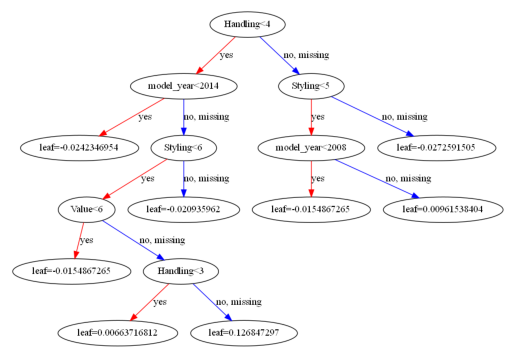

In [159]:
plot_tree(model)

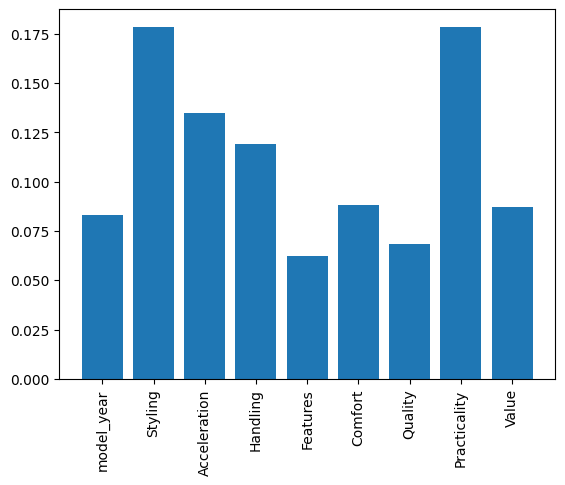

In [160]:

plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()



### Cool factor isn't such a straightforward non-linear relation.

However, Doug mentioned fun factor is more dependent on him, whilst cool factor is about others turning heads not necessarily him. Therefore 43% accuracy reflects some aspect of hit or miss nature of "cool". At the least, the most significant features are styling, acceleration, handling and practiaclity. The practiciality aspect may be attributed to Doug's keeness towards pickups for their load capacity.